# Final Project for Pattern Recogintion # 
## Rachael Shudde and Preston Werner ##

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np
from sklearn import datasets
from sklearn import neural_network
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import statistics
from tabulate import tabulate
from decimal import Decimal

# Read in the data and drop a lot of tables #

In [66]:
readIn = pd.read_csv('admitData.csv', low_memory = False)

In [67]:
readIn[:3]

,aID,TERM_CODE,EntryTermOffset,STU_TYPE,enrollmentProbabilityScore,dtCreated,enrollFlag,RET_T2,RET_T3,SUS,...,SAT_MathQuant,SAT_Writing,SAT_WritingEquiv,SAT_CompEquiv,SAT_MathQuantEquiv,SAT_EngVerbEquiv,HS_VAR1,ComboRank,RegressionRank,AcademicRank
0,2886776,201710,2,F,NaN,00:08.6,0,NaN,NaN,04:37.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2886777,201710,2,F,NaN,00:08.6,0,NaN,NaN,04:37.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2886778,201710,2,F,NaN,00:08.6,0,NaN,NaN,04:37.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Below is a rough list of what we dropped and in what order we dropped it

Dropping:

cID - extraneous identifier 
Market_Segment - 
Facebook_Status - 
Parent_ACU_Distance
Territory_URM
Territory_Manager
Territory_State
Territory_County
Territory_ZIP
enrollmentProbabilityScore - being put into currentModel variable
Territory_URM
Territory_Manager
Territory_Code

SourceCat_txt
SourceGroup_txt
Source_txt
SourceCat_INQ_txt
SourceGroup_INQ_txt
Source_INQ_txt
SearchSourceFlag

HSCEEB
ChurchCode
HasValidPhone
ClearinghouseFICE
ClearinghouseName
ClearinghouseDistanceFromHome
ClearinghouseControl
ClearinghouseCost
ClearinghouseZip5
ChurchActivities
AppLaunchGroup

//// for now dropping all PRISM information 
PRIZM_Segment
PRIZM_SocialSegment
PRIZM_LifestyleSegment
// PRIZM_HouseholdIncome
PRIZM_EducBaPercent -> ask Garrett about this 

Latitude
Longitude
ZIP_CODE
ENROLL_STATUS
ADMIT_TYPE
IntentToEnroll
enrollModelScore
enrollModelScoreBand
applyModelScore
QUAL_Status
QUAL_Date

ComboRank
RegressionRank
AcademicRank
HS_VAR1
SAT_EngVerbEquiv
SAT_MathQuantEquiv
SAT_CompEquiv
SAT_WritingEquiv

NCAA_GPA
ACU_AcademicRating
HS_RANK
CLASS_RANK_QUARTILE_CALC
CLASS_RANK_QUARTILE
PSAT_SAT_ScoreBand
PSU_GPA_Status

FAFSA
Camp_Count
Sibling_Count
Referral_Count - how many people wanted the student to come / Referral_Ind gives a boolean if they were refered 
MarketSegment_txt - MarketSegment should have all we need 


//// ask about
STU_TYPE
dtCreated
CollegeCode
HSCode

/// legacy stuff
'Legacy_Ind',
'Sibling_Ind',
'Camper_Ind',
'Board_Ind',
'Referral_Ind'

// columns have no data
Athlete_Ind
Honors_Elligible_Ind

// term code, drop for now 
TERM_CODE
SUS
PSP
EntryTermOffset


/// SAT stuff
 'SAT_TO_ACT_EQUIV', -> keep
  'ACT_COMP', -> keep
  
 'ACU_AcadRatingBand',
 'NUM_Advanced_Courses',
 'ACT_EngVerb',
 'ACT_MathQuant',
 'ACT_Reading',
 'ACT_Science',
 'ACT_Writing',
 'SAT_Comp',
 'SAT_EngVerb',
 'SAT_MathQuant',
 'SAT_Writing'
 
'ACT_EngVerb', 'ACT_MathQuant','ACT_Reading','ACT_Science','ACT_Writing','SAT_Comp',SAT_EngVerb','SAT_MathQuant','SAT_Writing'

In [68]:
original = readIn
currentModel = original['enrollmentProbabilityScore']
currentModel2 = original['ComboRank']
term = original['TERM_CODE']

In [69]:
original = original.drop(['cID', 'Territory_Code', 'Market_Segment', 'Territory_URM', 'Territory_Manager', 'Facebook_Status', 'Parent_ACU_Distance', 'Territory_URM', 'Territory_Manager', 'Territory_State', 'Territory_County', 'Territory_ZIP'], axis = 1)
original = original.drop(['SearchSourceFlag', 'Source_INQ_txt', 'SourceGroup_INQ_txt', 'SourceCat_INQ_txt', 'Source_txt', 'SourceGroup_txt', 'SourceCat_txt'], axis = 1)
original = original.drop(['AppLaunchGroup', 'ChurchActivities', 'ClearinghouseZip5', 'ClearinghouseZip5', 'ClearinghouseCost', 'ClearinghouseControl', 'ClearinghouseLevel', 'ClearinghouseDistanceFromHome', 'ClearinghouseName', 'ClearinghouseFICE', 'HasValidPhone', 'ChurchCode', 'HSCEEB'], axis = 1)
original = original.drop(['PRIZM_Segment', 'PRIZM_SocialSegment', 'PRIZM_LifestyleSegment', 'PRIZM_EducBaPercent'], axis = 1)
original = original.drop(['Latitude', 'Longitude', 'ZIP_CODE', 'ENROLL_STATUS', 'ADMIT_TYPE', 'IntentToEnroll', 'enrollModelScore', 'enrollModelScoreBand', 'applyModelScore', 'QUAL_Status', 'QUAL_Date'], axis = 1)
original = original.drop(['ComboRank', 'RegressionRank', 'AcademicRank', 'HS_VAR1', 'SAT_EngVerbEquiv', 'SAT_MathQuantEquiv', 'SAT_CompEquiv', 'SAT_WritingEquiv'], axis = 1)
original = original.drop(['NCAA_GPA', 'ACU_AcademicRating', 'HS_RANK', 'CLASS_RANK_QUARTILE_CALC', 'CLASS_RANK_QUARTILE', 'PSAT_SAT_ScoreBand', 'PSU_GPA_Status'], axis = 1)
original = original.drop(['FAFSA', 'Sibling_Count', 'Camp_Count', 'Referral_Count', 'MarketSegment_txt'], axis = 1)
original = original.drop(['STU_TYPE', 'dtCreated', 'CollegeCode', 'HSCode'], axis = 1)
original = original.drop(['Legacy_Ind', 'Sibling_Ind', 'Camper_Ind', 'Board_Ind', 'Referral_Ind'], axis = 1)
original = original.drop(['TERM_CODE', 'SUS', 'PSP', 'EntryTermOffset'], axis = 1)
original = original.drop(['Athlete_Ind', 'Honors_Elligible_Ind'], axis = 1)
original = original.drop(['ACT_EngVerb', 'ACT_MathQuant','ACT_Reading','ACT_Science','ACT_Writing','SAT_Comp', 'SAT_EngVerb','SAT_MathQuant','SAT_Writing'], axis = 1)
original = original.drop(['ACU_AcadRatingBand'], axis = 1)
original = original.drop(['ACU_Distance_Band', 'Parent_ACU_Distance_Band'], axis = 1)

Now we're dropping all rows where there are high school students whose names ACU has bought and hte studnet has showed no interest. Now we only have students who were admitted to ACU.

In [70]:
# original = original[pd.notnull(original['INQ'])]
original = original[pd.notnull(original['COMP'])]
original = original.drop(['INQ', 'APP', 'COMP'], axis = 1 )

In [71]:
# we should now have 58 columns. We can cut this down more
print("number of columns: ", len(original.columns), "number of rows: ", original.shape[0])

number of columns:  34 number of rows:  26629


In [72]:
original['RET_T2'] = original['RET_T2'].fillna(0)
original['RET_T3'] = original['RET_T3'].fillna(0)
original.RET_T2 = original.RET_T2.astype(int)
original.RET_T3 = original.RET_T3.astype(int)
original.Gender = original.Gender.astype(int)

# Function to Calculate TP, FP, TN, FN #
Sorce: https://stackoverflow.com/questions/31324218/scikit-learn-how-to-obtain-true-positive-true-negative-false-positive-and-fal?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa

In [73]:
def perf_measure(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i]==1:
           TP += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
           FP += 1
        if y_actual[i]==y_hat[i]==0:
           TN += 1
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
           FN += 1
        
    return(TP, FP, TN, FN)

http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Imputer.html

Now we go through various lists and clean up data. Some columns we delete rows where there is no data, other columns we replace missing data with values like  0 or something fitting to that column. 

In [75]:
# fill in zeros
original['RET_T2']=original['RET_T2'].fillna(0)
original['RET_T3']=original['RET_T3'].fillna(0)
original['RET_T3']=original['RET_T3'].fillna(0)
original['ACT_COMP']=original['ACT_COMP'].fillna(0)
original['SAT_TO_ACT_EQUIV']=original['SAT_TO_ACT_EQUIV'].fillna(0)

In [76]:
# combine SAT and ACT scores
# ACT -  'ACT_COMP'
# SAT converted to ACT - 'SAT_TO_ACT_EQUIV'
original['ACT'] = (np.where('ACT_COMP' > 'SAT_TO_ACT_EQUIV', original['ACT_COMP'], original['SAT_TO_ACT_EQUIV']))
original = original.drop(['ACT_COMP', 'SAT_TO_ACT_EQUIV'], axis = 1)

In [77]:
# fix first visit things
original['FirstSeniorVisit'] = original['FirstSeniorVisit'].str.replace('.*', '1') # try to repalce any text
original['FirstSeniorVisit'] = original['FirstSeniorVisit'].fillna(0) # fill in the NaN
original['FirstSeniorVisit']  = pd.to_numeric(original['FirstSeniorVisit'] , errors='coerce')

original['FIRSTVISIT'] = original['FIRSTVISIT'].str.replace('.*', '1') # try to repalce any text
original['FIRSTVISIT'] = original['FIRSTVISIT'].fillna(0) # fill in the NaN
original['FIRSTVISIT']  = pd.to_numeric(original['FIRSTVISIT'] , errors='coerce')

# make a new column to say if they've visited or not
original['Visited'] = (original['FIRSTVISIT'] | original['FirstSeniorVisit'])

# drop the original columns we replaced
original = original.drop(['FIRSTVISIT', 'FirstSeniorVisit'], axis = 1)

In [78]:
# 1 - US / 0 - otherwise
# 1 - Abilene / 0 - otherwise
# 1 - CC /  0 - otherwise
# fix GPA
original['Country_txt']=original['Country_txt'].fillna(0)
original['Territory_txt']=original['Territory_txt'].fillna(0)
original['State_txt']=original['State_txt'].fillna(0)
original['Taylor_County'] = original['County_txt'].apply(lambda x: 1 if x == "Taylor" else 0)
original['US'] = original['Country_txt'].apply(lambda x: 1 if x == "US - United States" else 0)
original['Abilene'] = original['Territory_txt'].apply(lambda x: 1 if x == "Abilene" else 0)
original['Texas'] = original['State_txt'].apply(lambda x: 1 if x == "TX" else 0)
original = original.drop(['Country_txt', 'Territory_txt', 'State_txt', 'County_txt'], axis = 1)
# original['HS_GPA_CALC'] = original['HS_GPA_CALC'].apply(lambda x: 4.0 if x > 4.0)


original['Denomination_txt']=original['Denomination_txt'].fillna(0)
original['CoC'] = original['Denomination_txt'].apply(lambda x: 1 if x == "CC" else 0)

original['Ethnicity'] = original['Ethnicity_txt'].apply(lambda x: 1 if x == "W - White" else (2 if x == 'B - Black' else (3 if x == 'H - Hispanic' else 4)))
original = original.drop(['Ethnicity_txt'], axis = 1)

Now we have filtered out all rows where a student has not applied. We will now continue to filter down rows

In [79]:
# get rid of deposit values (DEP) / confirmed (CNF) / orientation (PPT) / first score
original = original.drop(['DEP', 'CNF', 'PPT', 'FIRSTSCORE', 'Denomination_txt', 'ZIP5'], axis = 1)

In [80]:
# 1 if admitted / 0 if not admitted
# 1 if admitted but cancelled / 0 else 
# 1 if CC / 0 else
original['ADM'] = original['ADM'].fillna(0)
original['ADM'] = original['ADM'].apply(lambda x: 0 if x == 0 else 1)
original['CAN'] = original['CAN'].fillna(0)
original['CAN'] = original['CAN'].apply(lambda x: 0 if x == 0 else 1)


In [81]:
# columns getting a 0 if no information
original['NUM_Advanced_Courses'] = original['NUM_Advanced_Courses'].fillna(0)
original['QUAL_Familiarity'] = original['QUAL_Familiarity'].fillna(0)
original['QUAL_Rank'] = original['QUAL_Rank'].fillna(0)

In [82]:
# columns dropped if no info: GPA (HS_GPA_CALC) / class rank (HS_RankPercent)
original = original[pd.notnull(original['HS_GPA_CALC'])]
original = original[pd.notnull(original['HS_RankPercent'])]
original = original[pd.notnull(original['PRIZM_HouseholdIncome'])]
original = original[pd.notnull(original['ACU_Distance'])]

In [83]:
# come back to this if necessary 
original = original.drop(['aID', 'BirthDate'], axis = 1)

In [84]:
original.to_csv('out.csv')
print("number of columns: ", len(original.columns), "number of rows: ", original.shape[0])

number of columns:  25 number of rows:  12485


# Now we begin training a decision tree #

In [85]:
admitted = original['ADM']
semester1 = original['RET_T2']
semester2 = original['RET_T3']
cancelled = original['CAN']
enrolled = original['enrollFlag']
currentModel = original['enrollmentProbabilityScore']
currentModel = currentModel.fillna(999)


demo2 = original.drop(['ADM', 'RET_T2', 'RET_T3', 'CAN', 'enrollmentProbabilityScore', 'enrollFlag'], axis = 1)
print(demo2.columns)

demo2.to_csv('out2.csv')

Index(['Gender', 'Core_Ind', 'Parent_Same_LastName', 'ACU_Distance',
       'PRIZM_HouseholdIncome', 'QUAL_Familiarity', 'QUAL_Rank', 'HS_SIZE',
       'HS_RankPercent', 'HS_GPA_CALC', 'NUM_Advanced_Courses', 'ACT',
       'Visited', 'Taylor_County', 'US', 'Abilene', 'Texas', 'CoC',
       'Ethnicity'],
      dtype='object')


In [86]:
print("number of columns: ", len(demo2.columns), "number of rows: ", demo2.shape[0])

number of columns:  19 number of rows:  12485


In [21]:
#split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(demo2, enrolled, test_size=0.2)

In [87]:
parameters = {'min_samples_split': np.arange(10, 15),
              'min_samples_leaf': np.arange(10, 15),
              'max_leaf_nodes': np.arange(10, 15)
             }

estimator = DecisionTreeClassifier(max_depth = 4)
tree = GridSearchCV(estimator, param_grid = parameters, n_jobs = -1, verbose = 1, cv = 10)
tree.fit(X_train, y_train)

Fitting 10 folds for each of 125 candidates, totalling 1250 fits


[Parallel(n_jobs=-1)]: Done 144 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 744 tasks      | elapsed:   13.5s
[Parallel(n_jobs=-1)]: Done 1250 out of 1250 | elapsed:   19.9s finished


GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'min_samples_split': array([10, 11, 12, 13, 14]), 'min_samples_leaf': array([10, 11, 12, 13, 14]), 'max_leaf_nodes': array([10, 11, 12, 13, 14])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

Below are the paramaters our grid search found and the score of our tree

In [89]:
tree.best_params_

{'max_leaf_nodes': 10, 'min_samples_leaf': 14, 'min_samples_split': 10}

In [90]:
tree.score(X_test, y_test)

0.87304765718862631

Get the confusion matrix information (actual matrix made in presentation) 

In [92]:
tempResults = tree.predict(X_test)
tempY = y_test.tolist()
analysis = perf_measure(tempY, tempResults)
# analysis
# return(TP, FP, TN, FN)
print("The TP rate is: ", analysis[0])
print("The FP rate is: ", analysis[1])
print("The TN rate is: ", analysis[2])
print("The FN rate is: ", analysis[3])

The TP rate is:  191
The FP rate is:  115
The TN rate is:  1989
The FN rate is:  202


In [93]:
PredictResults = tree.predict_proba(X_test)

In [ ]:
currentModel1 = currentModel.tolist()
enrolled1 = enrolled.tolist()

Compare our resutls with ACU model scores. This comparison is based on a lot of assumptions, apparently the ACU model is pretty complicated and not complete for the data that we recieved.

In [95]:
# compare to  currentModel
for x in range(10):
    ours = PredictResults[x][1]
    theirs = currentModel1[x]/10
    actual = "NO"
    if ours >= .5:
        ourPredict = "YES"
    else:
        ourPredict = "NO"
    if theirs >= .5:
        theirPredict = "YES"
    else:
        theirPredict = "NO"
    if enrolled1[x] == 1:
        actual = "YES"
    print("Our model score: ", format(ours, '7.2f'), "\tACU model score: ", format(theirs, '7.2f'), "\tOur prediction: ",  ourPredict, "\t\tACU prediction: ", theirPredict, "\tActual: ", actual)

Our model score:     0.88 	ACU model score:     0.20 	Our prediction:  YES 		ACU prediction:  NO 	Actual:  NO
Our model score:     0.03 	ACU model score:     0.40 	Our prediction:  NO 		ACU prediction:  NO 	Actual:  NO
Our model score:     0.03 	ACU model score:     0.30 	Our prediction:  NO 		ACU prediction:  NO 	Actual:  NO
Our model score:     0.03 	ACU model score:    99.90 	Our prediction:  NO 		ACU prediction:  YES 	Actual:  NO
Our model score:     0.34 	ACU model score:     0.20 	Our prediction:  NO 		ACU prediction:  NO 	Actual:  YES
Our model score:     0.70 	ACU model score:     0.30 	Our prediction:  YES 		ACU prediction:  NO 	Actual:  YES
Our model score:     0.03 	ACU model score:     0.60 	Our prediction:  NO 		ACU prediction:  YES 	Actual:  NO
Our model score:     0.03 	ACU model score:     0.40 	Our prediction:  NO 		ACU prediction:  NO 	Actual:  YES
Our model score:     0.03 	ACU model score:     0.10 	Our prediction:  NO 		ACU prediction:  NO 	Actual:  YES
Our model s

Train a random forrest, just for kicks. It doesn't do that much better

In [96]:
randomForrestTrained = RandomForestClassifier(n_estimators = 700, max_depth = 4, min_samples_split = 14, max_leaf_nodes = 10, min_samples_leaf = 10)
randomForrestTrained.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=10,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=14,
            min_weight_fraction_leaf=0.0, n_estimators=700, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [98]:
randomForrestTrained.score(X_test, y_test)

0.87865438526231476

# Get the feature importance list # 

Feature ranking:
1. feature 12 (0.474589)
2. feature 6 (0.235503)
3. feature 5 (0.121183)
4. feature 1 (0.072555)
5. feature 3 (0.026723)
6. feature 17 (0.017598)
7. feature 11 (0.013276)
8. feature 9 (0.011680)
9. feature 18 (0.008654)
10. feature 15 (0.005288)
11. feature 8 (0.004932)
12. feature 7 (0.003570)
13. feature 4 (0.002315)
14. feature 10 (0.001271)
15. feature 2 (0.000332)
16. feature 16 (0.000289)
17. feature 0 (0.000241)
18. feature 13 (0.000000)
19. feature 14 (0.000000)


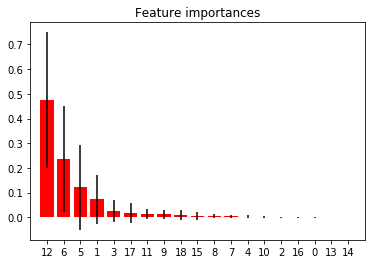

In [100]:
importances = randomForrestTrained.feature_importances_
std = np.std([tree.feature_importances_ for tree in randomForrestTrained.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(demo2.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(demo2.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(demo2.shape[1]), indices)
plt.xlim([-1, demo2.shape[1]])
plt.savefig('FeatureImportance.png')
plt.show()

In [101]:
headers = ["name", "score"]
values = sorted(zip(X_train.columns, importances), key=lambda x: x[1] * -1)
print(tabulate(values, headers, tablefmt="plain"))

name                         score
Visited                0.474589
QUAL_Rank              0.235503
QUAL_Familiarity       0.121183
Core_Ind               0.0725549
ACU_Distance           0.0267232
CoC                    0.017598
ACT                    0.0132756
HS_GPA_CALC            0.0116802
Ethnicity              0.00865397
Abilene                0.00528783
HS_RankPercent         0.00493172
HS_SIZE                0.00356979
PRIZM_HouseholdIncome  0.00231528
NUM_Advanced_Courses   0.00127077
Parent_Same_LastName   0.000332377
Texas                  0.000289312
Gender                 0.000241375
Taylor_County          0
US                     0


# Predict the scores for a lot of students! # 
## This will be the second colum n in the data. Just use the "Test.csv" to predict scores for any number of students. ##

In [102]:
test = pd.read_csv('Test.csv')

In [103]:
tree.predict_proba(test)

array([[ 0.65978774,  0.34021226],
       [ 0.46153846,  0.53846154],
       [ 0.96927458,  0.03072542],
       [ 0.46153846,  0.53846154],
       [ 0.65978774,  0.34021226],
       [ 0.65978774,  0.34021226],
       [ 0.46153846,  0.53846154]])

In [104]:
enrolled[:5]

26758    0
26764    0
26767    0
26769    0
26770    1
Name: enrollFlag, dtype: int64

# Predict how an individual student's score could change #
Enter an individual student's information in "Individual.csv" to be able to see how their score would change based on if they had different information for the four most important features.

Below, reclassify the student based on four different variable changes

In [105]:
testIndividual = pd.read_csv('Individual.csv')
combinedProbabilities = []
originalPrediction = round((tree.predict_proba(testIndividual))[0][1],3)

In [106]:
# flip sign of visited
changeVisited = pd.read_csv('Individual.csv')
changeVisited['Visited'] = changeVisited['Visited'].apply(lambda x: 1 if x == 0 else 0) # switch the value of apply

combinedProbabilities.append(round((tree.predict_proba(changeVisited))[0][1],3))

In [107]:
# change QUAL_rank
changeRank = pd.read_csv('Individual.csv')
changeRank['QUAL_Rank'] = changeRank['QUAL_Rank'].apply(lambda x: x-1 if x > 1 else 1) # switch the value of apply

combinedProbabilities.append(round((tree.predict_proba(changeRank))[0][1],3))

In [108]:
# change QUAL_rank
changeFam = pd.read_csv('Individual.csv')
changeFam['QUAL_Familiarity'] = changeFam['QUAL_Familiarity'].apply(lambda x: x+1 if x < 4 else 4) # switch the value of apply

combinedProbabilities.append(round((tree.predict_proba(changeFam))[0][1],3))

In [109]:
# flip sign of core index
changeCore = pd.read_csv('Individual.csv')
changeCore['Core_Ind'] = changeCore['Core_Ind'].apply(lambda x: 1 if x == 0 else 0) # switch the value of apply

combinedProbabilities.append(round((tree.predict_proba(changeCore))[0][1],3))

In [110]:
print("The student's probability of coming to ACU is: ", originalPrediction)

print("\n")
print("The four most important factors in our model are: \n1. If the student has visited or not \n2. How the student ranked ACU on their list of colleges \n3. How familiar the student said they are with ACU \n4. If the student has a previous connnection to ACU")
print("\n")
###### print visited stuff
if (testIndividual.get_value(0, 'Visited') == 1):
    print("The student's visited status is: visited")
else:
    print("The student's visited status is: Not yet visited")
    
if (combinedProbabilities[0] > originalPrediction):
    print("Changing their visit staus to: ", changeVisited.get_value(0, 'Visited'), " increases their probability of coming to: ", combinedProbabilities[0])
else:
    print("Changing their visit staus to: ", changeVisited.get_value(0, 'Visited'), " decreases their probability of coming to: ", combinedProbabilities[0])

print("\n")
# print QUAL_RANK stuff 
if (testIndividual.get_value(0, 'QUAL_Rank') > 0):
    print("The student ranked ACU, on a scale of 1-5, on their preferences as: ", testIndividual.get_value(0, 'QUAL_Rank'))
    
    if (testIndividual.get_value(0, 'QUAL_Rank') < 5):
        
        if (combinedProbabilities[1] > originalPrediction):
            print("Changing their ranking of ACU to: ", changeRank.get_value(0, 'QUAL_Rank'), " increases their probability of coming to: ", combinedProbabilities[1])
        elif (combinedProbabilities[1] > originalPrediction):
            print("Changing their ranking of ACU to: ", changeRank.get_value(0, 'QUAL_Rank'), " decreases their probability of coming to: ", combinedProbabilities[1])
        else:
            print("Changing their ranking of ACU to: ", changeRank.get_value(0, 'QUAL_Rank'), " does not change their original probability of coming to ACU")

    else:
        print("That's as high as they can rank ACU")

else:
    print("We do not have data for how high the student preferenced coming to ACU! This is the second most important information for the classifier! Try to get this data")

print("\n")

# print QUAL_Fam stuff 
if (testIndividual.get_value(0, 'QUAL_Familiarity') > 0):
    print("The student, on a scale of 1-4, said they were: ", testIndividual.get_value(0, 'QUAL_Familiarity'), " familiar with ACU")
    
    if (testIndividual.get_value(0, 'QUAL_Familiarity') < 4):
        
        if (combinedProbabilities[2] > originalPrediction):
            print("Changing their self-reported familiarity of ACU to: ", changeRank.get_value(0, 'QUAL_Familiarity'), " increases their probability of coming to: ", combinedProbabilities[2])
        elif (combinedProbabilities[2] < originalPrediction):
            print("Changing their self-reported familiarity of ACU to: ", changeRank.get_value(0, 'QUAL_Familiarity'), " decreases their probability of coming to: ", combinedProbabilities[2])
        else:
            print("Changing their self-reported familiarity of ACU to: ", changeRank.get_value(0, 'QUAL_Familiarity'), " does not change their original probability of coming to ACU")
            
    else:
        print("That's as high as they can rank ACU")

else:
    print("We do not have data for how high the student said they were familiar with ACU! This is the third most important information for the classifier! Try to get this data")

print("\n")

###### print visited stuff
if (testIndividual.get_value(0, 'Core_Ind') == 1):
    print("The student's Core index status is: yes")
else:
    print("The student's core index status is: No")
    
if (combinedProbabilities[3] > originalPrediction):
    print("Changing their core index status to: ", changeVisited.get_value(0, 'Core_Ind'), " increases their probability of coming to: ", combinedProbabilities[3])

print("\n")

The student's probability of coming to ACU is:  0.538


The four most important factors in our model are: 
1. If the student has visited or not 
2. How the student ranked ACU on their list of colleges 
3. How familiar the student said they are with ACU 
4. If the student has a previous connnection to ACU


The student's visited status is: visited
Changing their visit staus to:  0  decreases their probability of coming to:  0.031


The student ranked ACU, on a scale of 1-5, on their preferences as:  3
Changing their ranking of ACU to:  2  does not change their original probability of coming to ACU


The student, on a scale of 1-4, said they were:  4  familiar with ACU
That's as high as they can rank ACU


The student's Core index status is: yes




# Visualization of Tree # 

In [111]:
columnNames = demo2.columns
classNames = ["No", "Yes"]

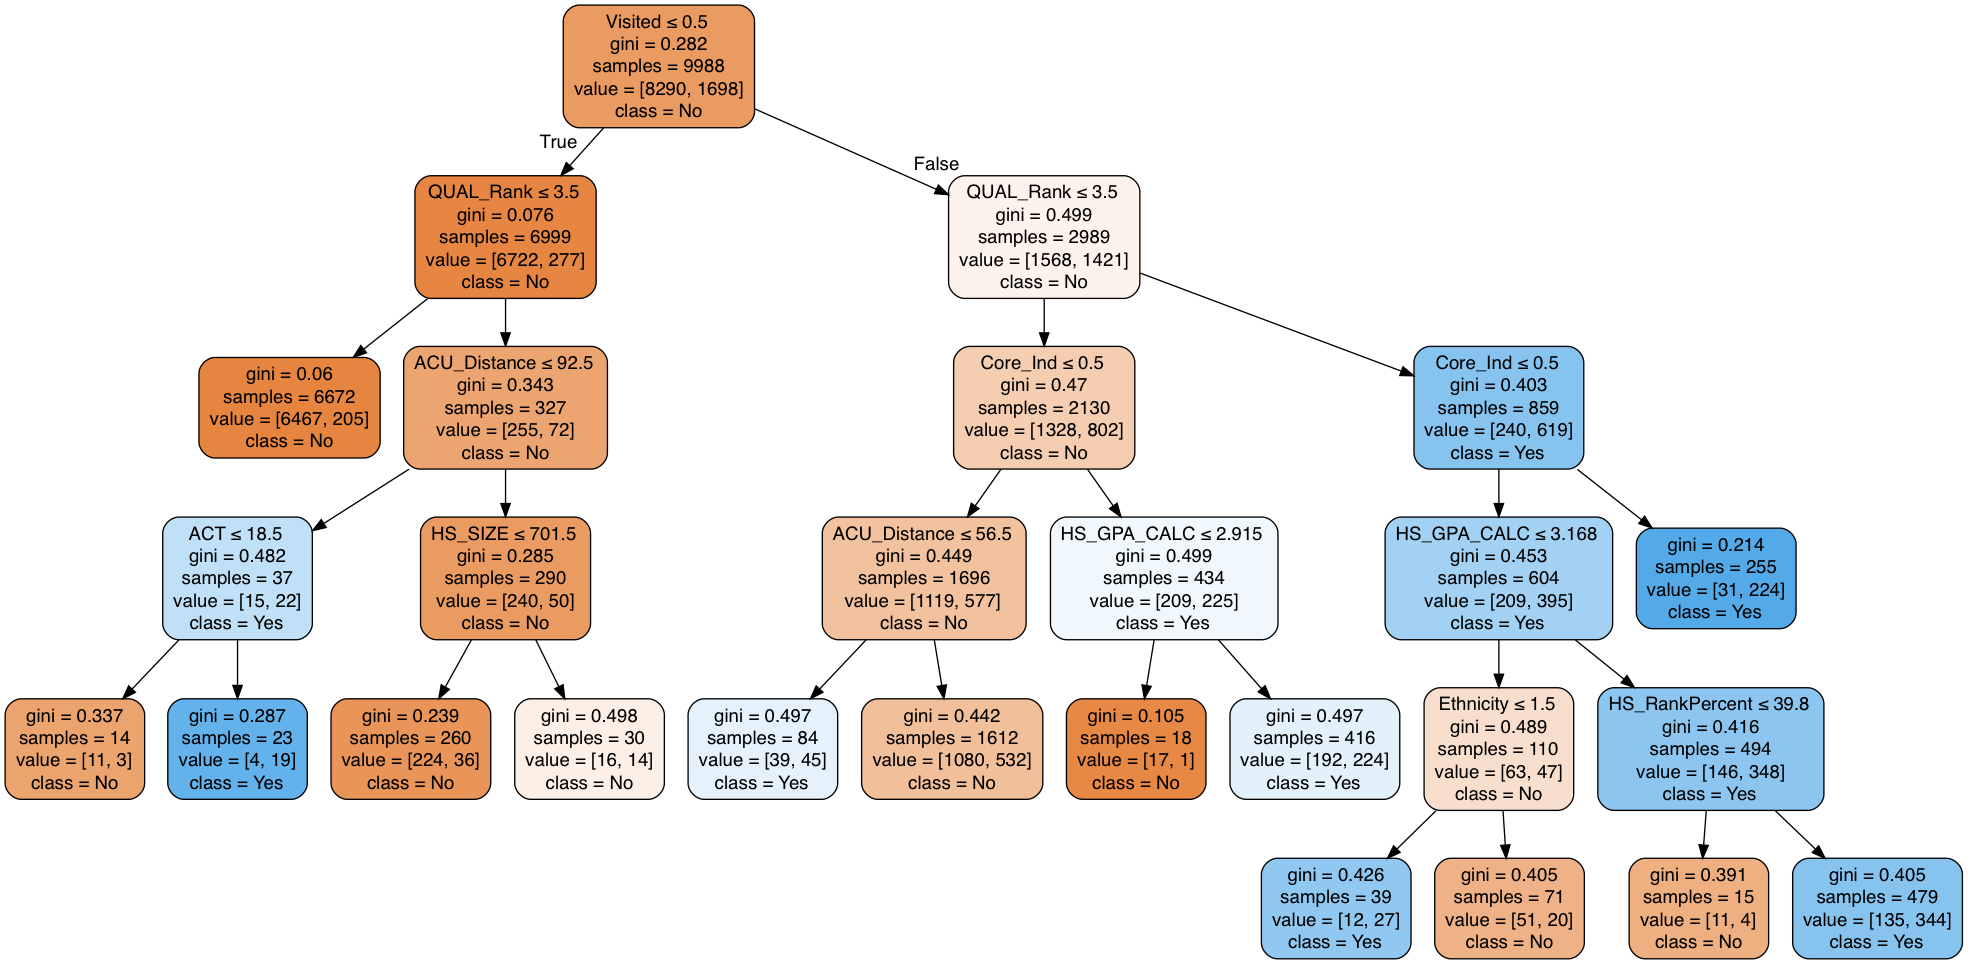

In [112]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

coolTree = DecisionTreeClassifier(max_depth = 4, max_leaf_nodes = 14, min_samples_leaf = 14, min_samples_split = 10)
coolTree.fit(X_train, y_train)
# featureNames = {}

dot_data = StringIO()
export_graphviz(coolTree, out_file=dot_data,  
                filled=True, rounded=True,
                feature_names = columnNames,
                class_names = classNames,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())
# plt.savefig('visualizationTree.png')


# THE END #